<a href="https://colab.research.google.com/github/tkoyama010/Colaboratory/blob/master/demo_unit_disk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Poisson's Equation on Unit Disk](https://gitpitch.com/tkoyama010/OpenCAE-tkoyama010/PyConJP2019#/)

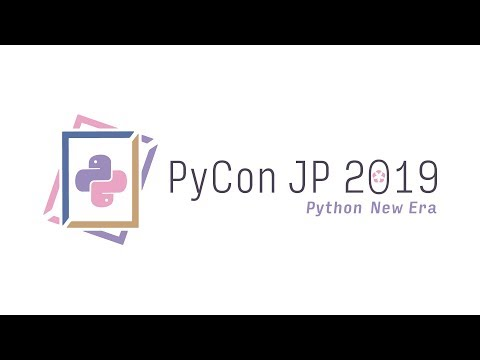

In [1]:
#@markdown This tutorial is a material of "Introduction to FEM Analysis with Python(Tetsuo Koyama)" in PyConJP2019.
from IPython.display import YouTubeVideo
YouTubeVideo('6JuB1GiDLQQ', width=600, height=400)

In [1]:
!apt install python-getfem++=5.2+dfsg1-6
!pip install meshio==2.3.10

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-getfem++ is already the newest version (5.2+dfsg1-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import getfem as gf
mo = gf.MesherObject('ball', [1.0, 1.0], 1.0)

In [0]:
# Approximate mesh length
h = 0.1
# Create Mesh Objects with second order elements
mesh = gf.Mesh('generate', mo, h, 2)

In [0]:
mesh.translate([-1.0, -1.0])
fb = mesh.outer_faces()
OUTER_BOUND = 1
mesh.set_region(OUTER_BOUND, fb)

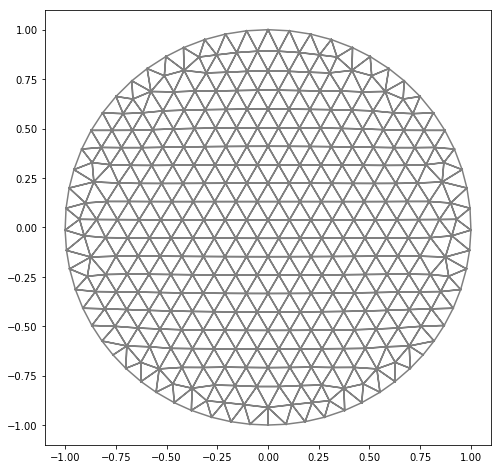

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import meshio

reader = meshio.read('sl.vtk')
x = reader.points
triangles = reader.cells["triangle"]

plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.figure(figsize=(8, 8))
plt.triplot(x[:,0], x[:,1], triangles, color='gray')

In [0]:
# The node has 1 degree of freedom
mfu = gf.MeshFem(mesh, 1)
elements_degree = 2
 
# classical lagrange elements
mfu.set_classical_fem(elements_degree)

In [0]:
md = gf.Model('real')
# Add the variable 'u' using the MeshFem object.
md.add_fem_variable('u', mfu)

In [8]:
# −\Delta u
mim = gf.MeshIm(mesh, pow(elements_degree,2))
md.add_Laplacian_brick(mim, 'u')
 
# RHS 1
import numpy as np
md.add_fem_data('F', mfu)
md.add_source_term_brick(mim, 'u', 'F')
md.set_variable('F', np.repeat(1.0, mfu.nbdof()))
 
# u=0 on OUTER_BOUND
md.add_Dirichlet_condition_with_multipliers(mim, 'u', elements_degree - 1, OUTER_BOUND)

2

In [0]:
md.solve()
U = md.variable('u')

In [0]:
sl = gf.Slice(('none',), mesh, 1)
sl.export_to_vtk('sl.vtk', 'ascii')

In [0]:
sl.export_to_vtk('u.vtk', 'ascii', mfu,  U, 'U')

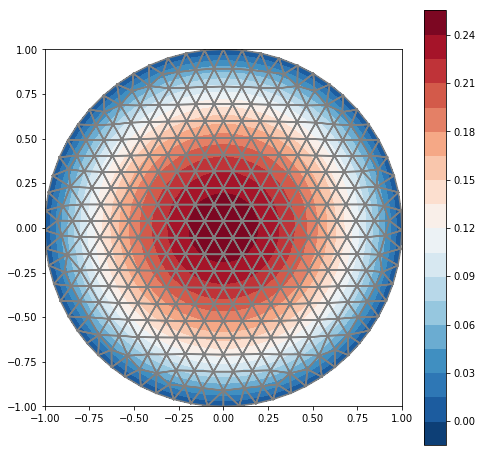

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import meshio

reader = meshio.read('u.vtk')
x = reader.points
triangles = reader.cells["triangle"]
point_data = reader.point_data["U"]

plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.figure(figsize=(8, 8))
plt.triplot(x[:,0], x[:,1], triangles, color='gray')
contour = plt.tricontourf(x[:,0], x[:,1], triangles, point_data, 16, cmap="RdBu_r");
plt.colorbar(contour)
plt.gca().set_aspect('equal')